### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

# Assignment activity 3: Analyse customer sentiments with reviews

Leaders at Turtle Games understand that in order to maximise sales performance, they must offer products with which their customers are satisfied. Turtle Games’ e-commerce site features the ability for customers to leave reviews. If customers are dissatisfied with faulty or underperforming products, sales will be impacted. 


## Objective

Using the reviews collected from Turtle Games’ e-store, identify the customer sentiments based on their reviews for toys and games.

1. What is the general sentiment of customers across all products?

2. Based on the polarity of the sentiment, what are the top 20 positive and top 20 negative reviews?


In [10]:
# Import libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Import nltk and download nltk's resources to assist with tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Import data
reviews = pd.read_csv("game_reviews.csv")

# View the data
print(reviews.shape)
reviews.head()

(15000, 9)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hamdihassan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


# 1. Pre-process the data

## Drop rows from the table that do not have any value for their COMMENTS field

In [11]:
# Drop rows with missing values
reviews.dropna(subset=['reviewText'], inplace=True)
reviews.shape

(14990, 9)

## 1.1 Change all the words in the comments to lower case

In [12]:
reviews['reviewText'] = reviews['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
reviews['reviewText'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: reviewText, dtype: object

## 1.2 Remove punctuation

In [13]:
reviews['reviewText'] = reviews['reviewText'].str.replace('[^\w\s]','')
reviews['reviewText'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: reviewText, dtype: object

## 1.3 Drop duplicates from the COMMENTS column

In [14]:
# Check the number of duplicate values in the COMMENTS column
reviews.reviewText.duplicated().sum()

909

In [15]:
# Drop duplicates
review = reviews.drop_duplicates(subset=['reviewText'])

In [16]:
# Preview data
review.reset_index(inplace=True)
review.head()

,index,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,when it comes to a dms screen the space on the...,The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,an open letter to galeforce9 your unpainted mi...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,nice art nice printing why two panels are fill...,"pretty, but also pretty useless",1473638400,NaN
3,3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,amazing buy bought it as a gift for our new dm...,Five Stars,1488412800,NaN
4,4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,as my review of gf9s previous screens these we...,Money trap,1486512000,NaN


In [17]:
review.shape

(14081, 10)

As we can see that the rows with empty fields and the duplicate entries in the COMMENTS column have been removed from the dataframe.

# 2. Visualise the most frequently used words

In [18]:
# String all the comments together in a single variable
all_reviews = ''
for i in range(review.shape[0]):
    all_reviews = all_reviews + review['reviewText'][i]

In [19]:
# Import along with matplotlib and seaborn for visualisation
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(color_codes=True)

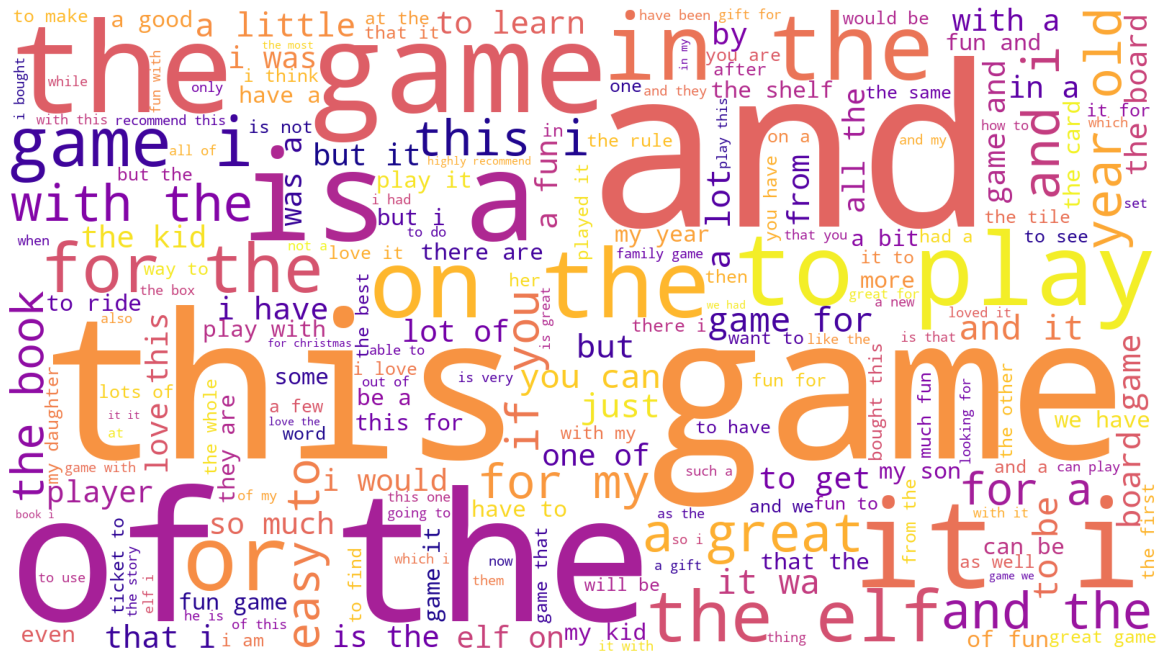

In [20]:
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap ='plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 
  
# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Notes:
From the word cloud above we can see that the many of the words that dominate the visualisation are stop words that do not offer any analytical value. In the following set of code blocks we will tokenise the words in the review and remove these stopwords.

# 3. Find the most frequently used words with tokenisation

## 3.1 Tokenisation

In [21]:
review['tokens'] = review['reviewText'].apply(word_tokenize)
review['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [22]:
# Combine all tokens into one list
all_tokens = []
for i in range(review.shape[0]):
    all_tokens = all_tokens + review['tokens'][i]

In [23]:
#  Compute the tokens with the maximum frequency
from nltk.probability import FreqDist
fdist = FreqDist(all_tokens)
fdist

FreqDist({'the': 32797, 'to': 21453, 'and': 21000, 'a': 18570, 'it': 15144, 'i': 12845, 'game': 12379, 'this': 12257, 'is': 12169, 'of': 11815, ...})

In [24]:
# Filter out tokens that are neither alphabets or numbers (to eliminate punctuation marks etc)
tokens1 = [word for word in all_tokens if word.isalnum()]

## 3.2 Eliminate stopwords

In [25]:
# Download the nltk resource, import the method, and extract stopwords in the English language.
nltk.download ('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hamdihassan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Create a list of tokens from the list of identified tokens after eliminating stopwords
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

## 3.4 Visualise the tokens of relevance in a word cloud

In [27]:
tokens2_string = ''
for value in tokens2:
    tokens2_string = tokens2_string + value + ' '

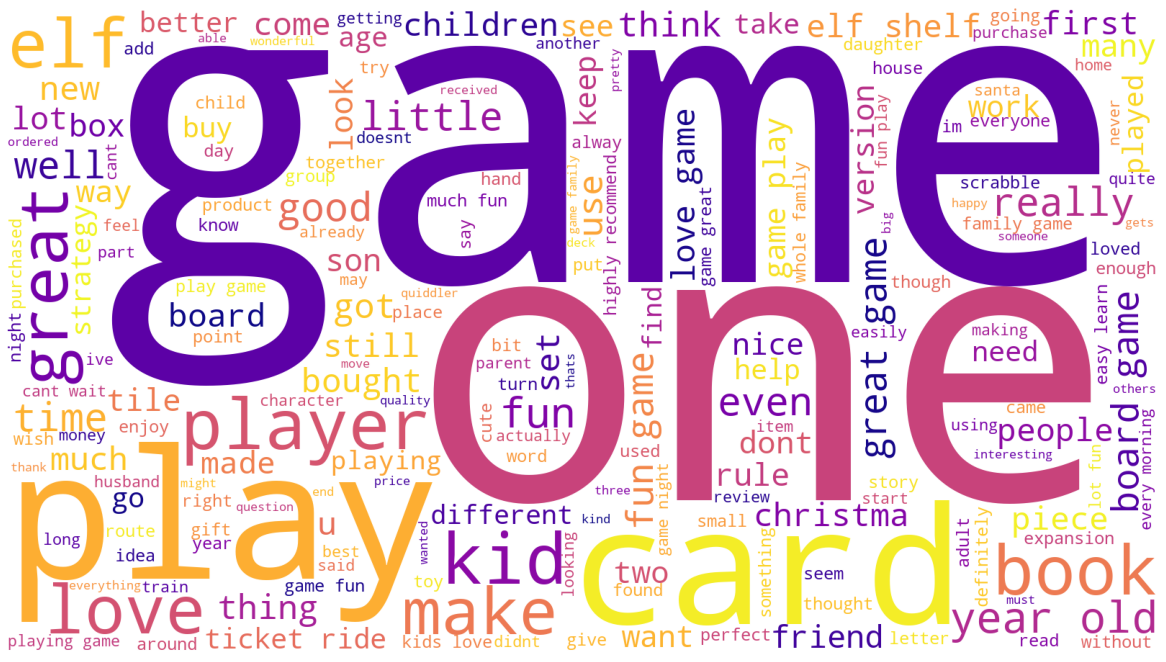

In [28]:
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Notes:

With the stopwords removed we can see that words such as game, play, player and card are now most prominent. 

## 4. Count the top 15 words that appear most often

In [29]:
# View the frequency distribution
fdist1 = FreqDist(tokens2)
fdist1

FreqDist({'game': 12379, 'fun': 5188, 'play': 4150, 'great': 4098, 'elf': 3285, 'love': 3031, 'one': 2982, 'family': 2818, 'kids': 2499, 'like': 2278, ...})

In [30]:
'''top 15 commonly used words across the comments.'''
# Import Counter
from collections import Counter

# Generate DF out of Counter
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                    columns=['Word', 'Frequency']).set_index('Word')
counts

,Frequency
Word,
game,12379
fun,5188
play,4150
great,4098
elf,3285
love,3031
one,2982
family,2818
kids,2499


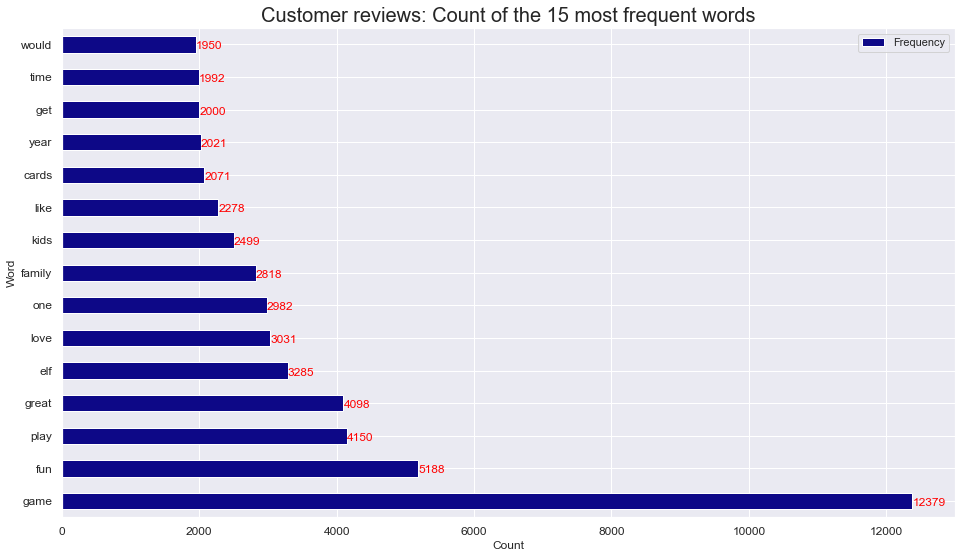

In [31]:
# Generate bar graph
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap ='plasma')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title("Customer reviews: Count of the 15 most frequent words", fontsize=20)

# Add annotations
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=12, color='red')


In [32]:
# Import
from textblob import TextBlob

# 5. Extract Polarity and Subjectivity

In [33]:
# [1] Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# [2] Populate a new column with polarity scores for each comment.
review['polarity'] = review['reviewText'].apply(generate_polarity)

# [3] Preview the result.
review['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

In [34]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
review['subjectivity'] = review['reviewText'].apply(generate_subjectivity)

# Preview the result.
review['subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity, dtype: float64

## 5.1 Visualise sentiment polarity scores on a histogram

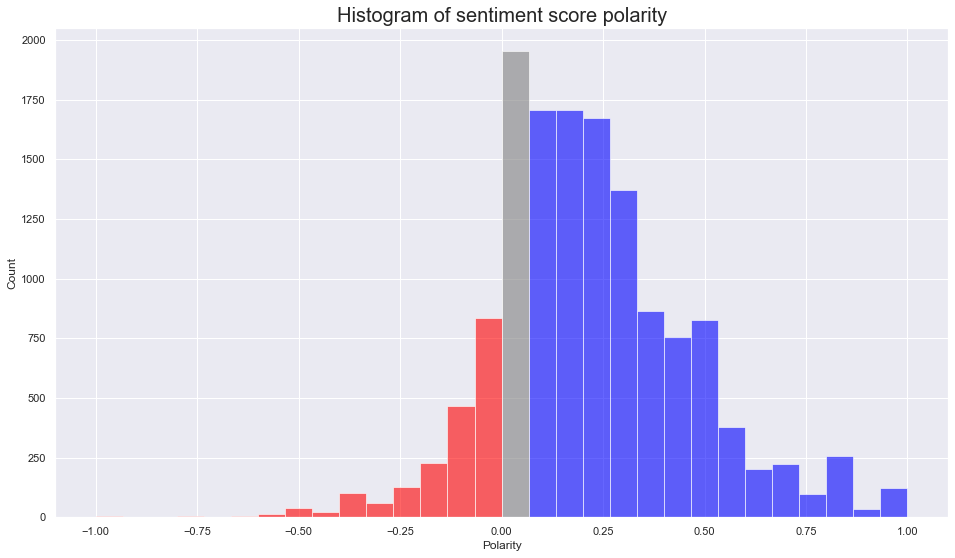

In [35]:
# Set the number of bins.
num_bins = 30

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(review['polarity'], num_bins,facecolor = 'grey', alpha=0.6)

# Highlight positive sentiment in blue
for patch in patches:
    if patch.get_x() > 0.05:
        patch.set_facecolor("blue")
    elif patch.get_x() < -0.05:
        patch.set_facecolor("red")

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)




plt.show()

In [36]:
# Mean polarity
review.polarity.mean()

0.21395021163812294

# Notes:

The Histogram of polarity score distribution is right skewed. We can infer from this that the general customer sentiment across all products is positive.



 # 6. Extract contextualised comments: most positive and negative comments

In [37]:
# [1] Create a DataFrame.
positive_sentiment = review.nlargest(20, 'polarity')

# [2] Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['reviewText', 'polarity','reviewerID']]

# [3] Adjust the column width.
positive_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

,reviewText,polarity,reviewerID
7,came in perfect condition,1.000000,A2UKOWP9ICU416
164,awesome book,1.000000,A9V7MUGGFFT7R
193,awesome gift,1.000000,A2D0AVXUJVHK1T
489,excellent activity for teaching selfmanagement skills,1.000000,A273OOTSQQP8ID
517,perfect just what i ordered,1.000000,A3GYWP2LZYRDLI
583,wonderful product,1.000000,A1K1J2TG88SOH8
601,delightful product,1.000000,A2MW38KK7OMHBX
613,wonderful for my grandson to learn the resurrection story,1.000000,A1FWWIJKFY48O
782,perfect,1.000000,A1ZSF3GAJMDLIJ
922,awesome,1.000000,A32YPU6CNW8U33


In [38]:
# Create a DataFrame.
negative_sentiment = review.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['reviewText', 'polarity','reviewerID']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

,reviewText,polarity,reviewerID
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000,A3SCMMOUFRA9VK
1987,kids did not like it thought it was boring,-1.000000,A28APXX53Y3OBG
3218,some of the suggestions are disgusting,-1.000000,A29ZPOASXZI493
7812,awful we did not receive what was advertised we paid 30 for the boxes set with book we got the elf in a bag without the book,-1.000000,A1NA67C1C1ESRB
7515,was the elf on the shelf but it didnt have the dvd i was very disappointed,-0.975000,A3S8TI3M8BCBRA
8861,i havent even taken it out of the box yet but its already falling apart i contacted customer service and never even got a response i am very disappointed in this product,-0.975000,A35OX0453C1M70
8198,i hate the holidays bcuz of the elf he was disgusting i hate him with my life he doesnot leave the shelf alone,-0.866667,A1XPH67ENP7SHV
12386,i do not under stand how you keep score or read the scoring i i do not like that at all i can never play score with anyone at all i hate that i cant play points,-0.800000,A1YGHW8VZ3GPRV
8531,cliche and stupid i should not drink and amazon,-0.800000,A3A522DVPJNI4D
8638,just stupid,-0.800000,AUBU47RORRSMB


# 7. Identify named entities

In the following code blocks I will use the two data frames that contain the top 20 positive and negative reviews to identify named entities customers use in their reviews that can give us an idea of what they like or dislike about the products.

In [39]:
# Import library
import spacy

# Load the English resource.
nlp = spacy.load('en_core_web_sm')

# Return the text snippet and its corresponding entity label in a list.
def generate_named_entities(comment):
    return [(ent.text.strip(), ent.label_) for ent in nlp(comment).ents]

In [40]:
# Reset index on both dfs to make it easier to itterate through the values using a the index

positive_sentiment = positive_sentiment.reset_index()

negative_sentiment = negative_sentiment.reset_index()

In [41]:
# Create a named_entities column which holds the reviewText

positive_sentiment['named_entities'] = positive_sentiment['reviewText'].apply(generate_named_entities)
negative_sentiment['named_entities'] = negative_sentiment['reviewText'].apply(generate_named_entities)

# view df
positive_sentiment.head()
negative_sentiment.head()

,index,reviewText,polarity,reviewerID,named_entities
0,207,booo unles you are patient know how to measure...,-1.000,A3SCMMOUFRA9VK,[]
1,1987,kids did not like it thought it was boring,-1.000,A28APXX53Y3OBG,[]
2,3218,some of the suggestions are disgusting,-1.000,A29ZPOASXZI493,[]
3,7812,awful we did not receive what was advertised w...,-1.000,A1NA67C1C1ESRB,"[(30, CARDINAL)]"
4,7515,was the elf on the shelf but it didnt have the...,-0.975,A3S8TI3M8BCBRA,[]


## 7. 1 Visualise named entities

In [42]:
# Positive Comments
from spacy import displacy

# Iterate through a selection of comments.
for i in range(0,20):
    # Check whether the corresponding comment has a named entity.
    if positive_sentiment['named_entities'][i]:
        # Highlight the entity in the comment.
        displacy.render(nlp(review['reviewText'][i]), style='ent', jupyter=True)

In [43]:
# Negative Comments

# Iterate through a selection of comments.
for i in range(0,20):
    # Check whether the corresponding comment has a named entity.
    if negative_sentiment['named_entities'][i]:
        # Highlight the entity in the comment.
        displacy.render(nlp(review['reviewText'][i]), style='ent', jupyter=True)

## 7.2 Generate a document-term matrix 

In [44]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(positive_sentiment['reviewText'])


In [45]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

              Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
awesome           0      1      1      0      0      0      0      0      0   
perfect           1      0      0      0      1      0      0      0      1   
wonderful         0      0      0      0      0      1      0      1      0   
best              0      0      0      0      0      0      0      0      0   
set               0      0      0      0      0      0      0      0      0   
product           0      0      0      0      0      1      1      0      0   
resurrection      0      0      0      0      0      0      0      1      0   
learn             0      0      0      0      0      0      0      1      0   
means             0      0      0      0      0      0      0      0      0   
ordered           0      0      0      0      1      0      0      0      0   

              Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
awesome            1       1       0       1       1       0  
perf

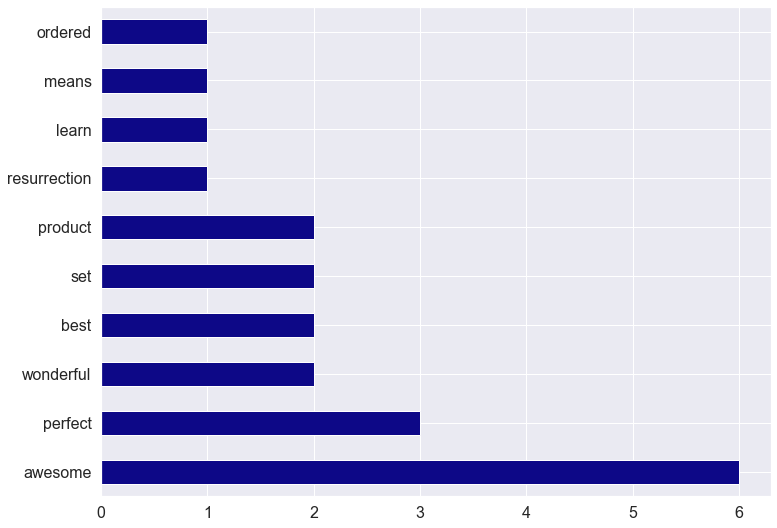

In [48]:
# visualise named entities from the top 20 positive reviews
a = document_term_matrix['total_count'].plot.barh(figsize=(12, 9), fontsize=16, colormap ='plasma')

### Notes: Positive named entities

From the top 20 positive reviews the named entities, in relation to  product features, that customers use include ordered, product and set. We can infer from this that customers are most satisfied with the product sets aswell as possibly the order process 

In [49]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(negative_sentiment['reviewText'])

In [50]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count']).head(10))

              Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
like              0      1      0      0      0      0      0      1      0   
disappointed      0      0      0      0      1      1      0      0      0   
play              0      0      0      0      0      0      0      2      0   
did               1      1      0      1      0      0      0      0      0   
hate              0      0      0      0      0      0      2      1      0   
box               0      0      0      0      0      1      0      0      0   
elf               0      0      0      1      1      0      1      0      0   
book              0      0      0      2      0      0      0      0      0   
score             0      0      0      0      0      0      0      2      0   
product           0      0      0      0      0      1      0      0      0   

              Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
like               0       0       1       0       3       0  
disa

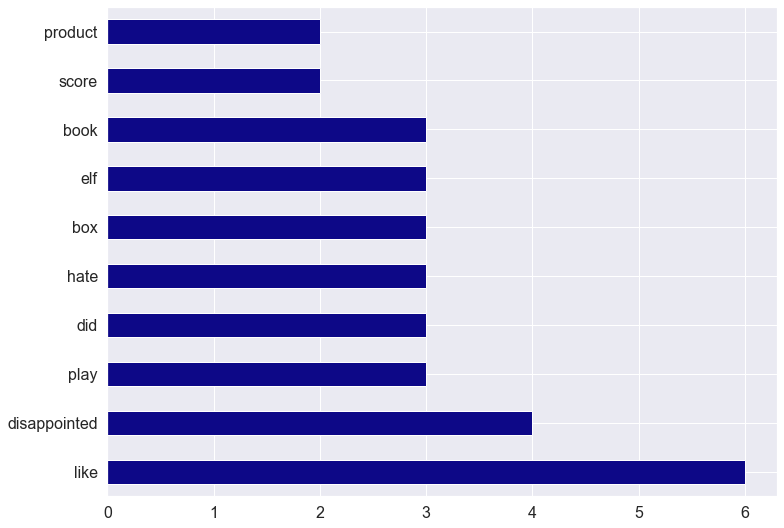

In [51]:
# Visualise for top 20 Negative named entities
b = document_term_matrix['total_count'].plot.barh(figsize=(12, 9), fontsize=16, colormap ='plasma')

### Notes: Negative named entities

From the top 20 negative reviews named entities such as product and box eature. This suggests that customers who post negative reviews are dissatisfied with the product and also possibly the packaging.